In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("clean_heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.788512,0,1,0.806035,0,0.014438,2,2,3,0
1,-0.157260,1,0,0.478910,-1.023252,1,0,0.237495,1,1.855450,0,0,3,0
2,1.724733,1,0,0.764066,-1.597060,0,1,-1.074521,1,1.467868,0,0,3,0
3,0.728383,1,0,0.935159,-1.023252,0,1,0.499898,0,-0.954515,2,1,3,0
4,0.839089,0,0,0.364848,1.115489,1,1,-1.905464,0,0.789601,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.503322,0,2,-0.661712,-0.814594,0,0,-1.511859,0,0.498915,1,0,2,1
298,-1.153610,0,2,-1.346085,-1.857882,0,1,1.112172,0,-0.373143,1,0,2,1
299,-0.267966,1,0,-0.205463,0.280859,0,1,0.499898,1,-0.954515,2,1,3,0
300,0.506972,1,3,1.619532,0.724256,0,0,-1.074521,0,-0.954515,2,0,2,0


### crete x and y

In [3]:
x=df.drop("target",axis=1)
y=df["target"]

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression  # Use a classifier
import pandas as pd

train = []
test = []
cv = []

for i in range(0, 101):
    # Splitting the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    
    # Using a classification model
    clf = LogisticRegression(random_state=i)
    clf.fit(x_train, y_train)
    
    # Training and testing accuracy scores
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    
    train.append(train_score)
    test.append(test_score)
    
    # Cross-validation score using accuracy
    cv.append(cross_val_score(clf, x_train, y_train, cv=5, scoring="accuracy").mean())

# DataFrame with train, test, and cross-validation scores
em = pd.DataFrame({"train": train, "test": test, "cv": cv})

# Selecting the best random state based on stable scores
gm = em[(abs(em["train"] - em["test"]) <= 0.05) & (abs(em["test"] - em["cv"]) <= 0.05)]
best_random_state = gm[gm["cv"] == gm["cv"].max()].index.to_list()[0]
print("Best random state:", best_random_state)


Best random state: 80


#### train_test_split

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=80)

**Stage-4 : Modelling & Evaluation**

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 1 Logistics Regression

In [7]:
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression()
log_model.fit(x_train,y_train)

#prediction  & evaluation on train data
ypred_train=log_model.predict(x_train)
print("Train accuracy:",accuracy_score(y_train,ypred_train))

#cross validation error
print("CV Score:",cross_val_score(log_model,x_train,y_train,cv=5,scoring="accuracy").mean())

#predict & Evaluation on test data
ypred_test = log_model.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train accuracy: 0.8630705394190872
CV Score: 0.850595238095238
Test Accuracy: 0.8360655737704918


In [8]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[22  8]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.78      0.94      0.85        31

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



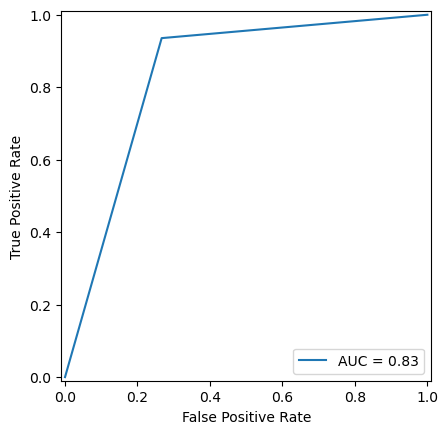

In [9]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr , tpr ,thresholds = roc_curve(y_test,ypred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [10]:
#AUC score
from sklearn.metrics import  roc_auc_score
roc_auc_score(y_test,ypred_test)

0.8344086021505377

# 2 KNN

*HPT*
*Modelling & Evaluation*

In [13]:
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors": list(range(1,50)),"p":[1,2]}
knn_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
knn_grid.fit(x_train,y_train)

knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=32, p=1)

In [14]:
knn_model=knn_grid.best_estimator_
knn_model.fit(x_train,y_train)

ypred_train=knn_model.predict(x_train)
print("Train accuracy :",accuracy_score(y_train,ypred_train))

print("cv :",cross_val_score(knn_model,x_train,y_train,cv=5,scoring="accuracy").mean())



ypred_test=knn_model.predict(x_test)
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8381742738589212
cv : 0.8467687074829933
Test accuracy : 0.8032786885245902


# SVM

In [15]:
from sklearn.svm import SVC
estimator=SVC()
param_grid={'C':[0.001,0.01,0.1,1,10],'kernel':["linear","sigmoid","poly","rbf"]}
svm_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
svm_grid.fit(x_train,y_train)
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [16]:
svm_model=svm_grid.best_estimator_
svm_model.fit(x_train,y_train)

ypred_train=svm_model.predict(x_train)
print("Train accuracy :",accuracy_score(y_train,ypred_train))

print("cv :",cross_val_score(svm_model,x_train,y_train,cv=5,scoring="accuracy").mean())



ypred_test=svm_model.predict(x_test)
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8547717842323651
cv : 0.8424319727891156
Test accuracy : 0.819672131147541


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=True)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=True)

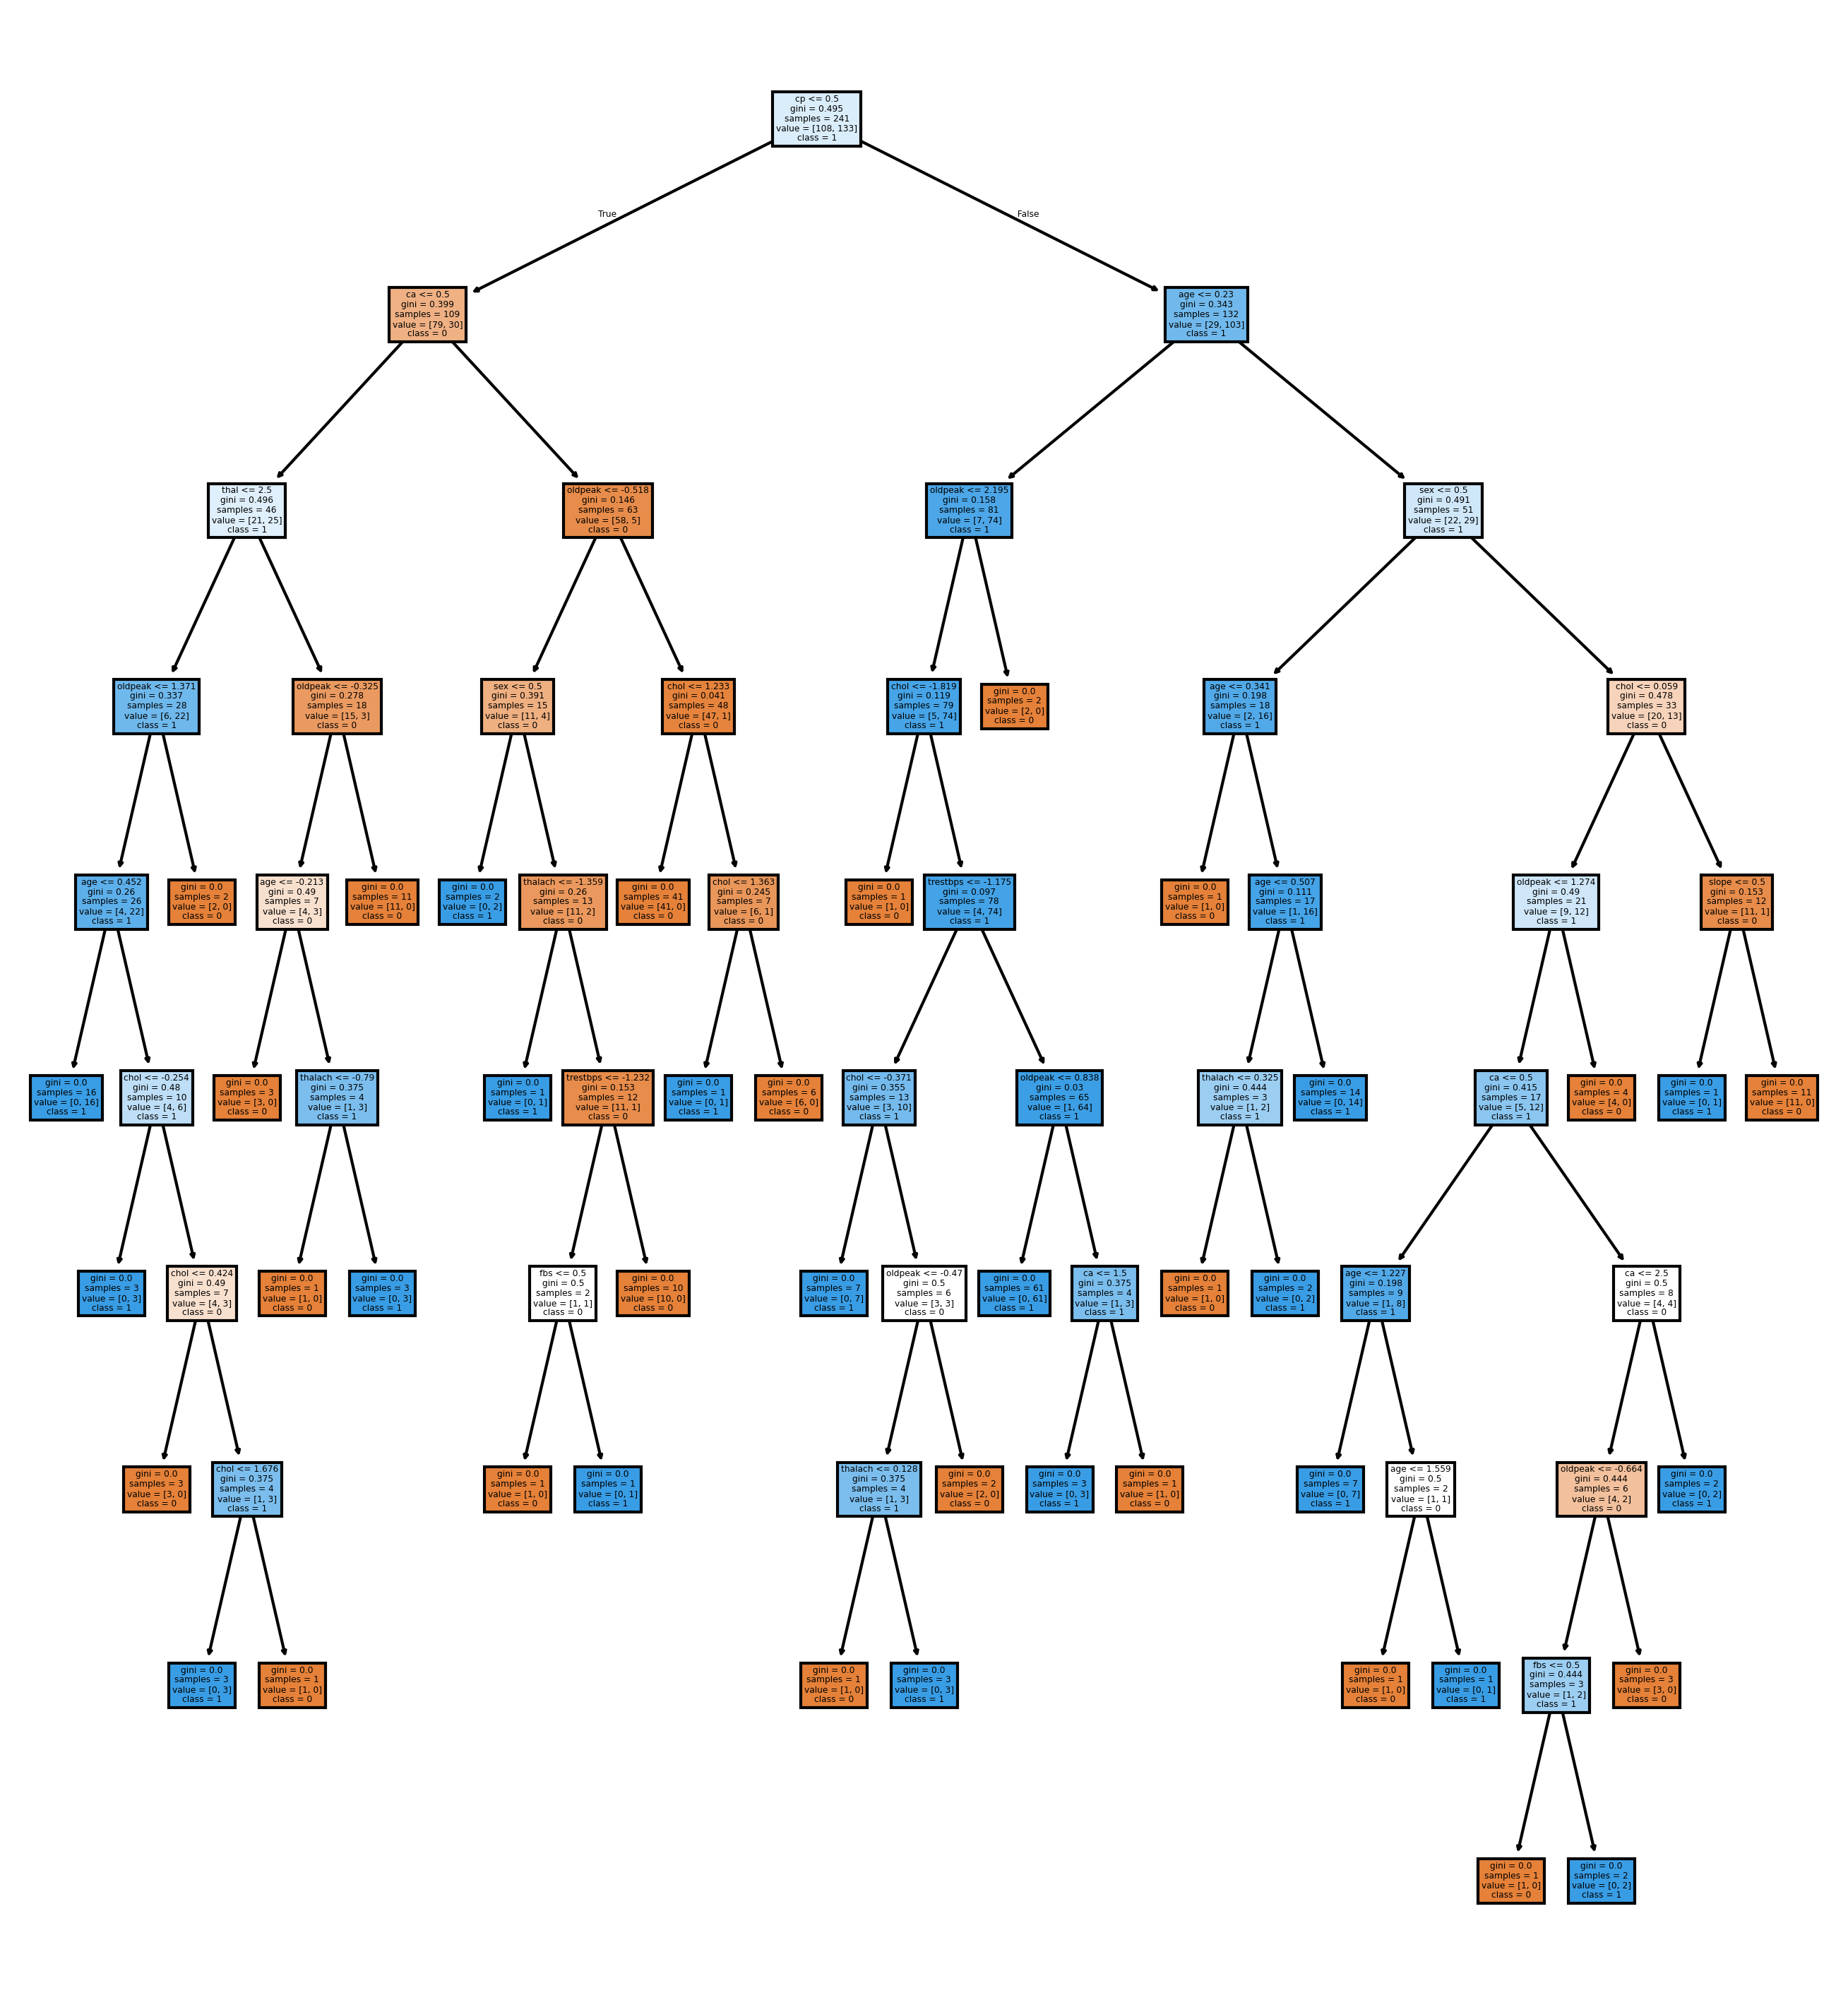

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(11,12),dpi=300)
plot_tree(model,filled=True,feature_names=x_train.columns.tolist(),class_names=["0","1"])
plt.show()

In [19]:
estimator=DecisionTreeClassifier(random_state=True)
param_grid={"criterion":["gini","entropy"],"max_depth":list(range(1,20))}
dt_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
dt_grid.fit(x_train,y_train)
dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=True)

In [20]:
fea=pd.DataFrame(data=dt.feature_importances_,index=x.columns,columns=["importance"])
features=fea[fea["importance"]>0].index.tolist()
features

['age', 'sex', 'cp', 'oldpeak', 'ca', 'thal']

#### Modeling

In [22]:
x_train_dt=x_train[features]
x_test_dt=x_test[features]

#modeling
dt=dt_grid.best_estimator_
dt.fit(x_train_dt,y_train)

ypred_train=dt.predict(x_train_dt)
ypred_test=dt.predict(x_test_dt)

print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(dt,x_train_dt,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8589211618257261
cv : 0.763860544217687
Test accuracy : 0.7868852459016393


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,20))}
rf_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
rf_grid.fit(x,y)
rf=rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=17, random_state=True)

In [24]:
fea=pd.DataFrame(data=rf.feature_importances_,index=x.columns,columns=["importance"])
features=fea[fea["importance"]>0].index.tolist()
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [25]:
x_train_rf=x_train[features]
x_test_rf=x_test[features]

#modeling
rf=rf_grid.best_estimator_
rf.fit(x_train_rf,y_train)

ypred_train=rf.predict(x_train_rf)
ypred_test=rf.predict(x_test_rf)

print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 1.0
cv : 0.8051020408163264
Test accuracy : 0.8032786885245902


# Ada Boost

In [26]:
from sklearn.ensemble import AdaBoostClassifier
estimator=AdaBoostClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,20))}
ada_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
ada_grid.fit(x,y)
ada=ada_grid.best_estimator_
ada

AdaBoostClassifier(n_estimators=3, random_state=True)

In [27]:
fea=pd.DataFrame(data=ada.feature_importances_,index=x.columns,columns=["importance"])
features=fea[fea["importance"]>0].index.tolist()
features

['cp', 'ca', 'thal']

In [28]:
x_train_ada=x_train[features]
x_test_ada=x_test[features]

#modeling
ada=ada_grid.best_estimator_
ada.fit(x_train_rf,y_train)

ypred_train=ada.predict(x_train_rf)
ypred_test=ada.predict(x_test_rf)

print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(ada,x_train_ada,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8340248962655602
cv : 0.8340986394557823
Test accuracy : 0.8688524590163934


 # Gradient

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
estimator=GradientBoostingClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,20)),"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
gb_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
gb_grid.fit(x,y)
gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(n_estimators=18, random_state=True)

In [30]:
feats_gb=pd.DataFrame(data=gb.feature_importances_,index=x.columns,columns=["importance"])
features=feats_gb[feats_gb["importance"]>0].index.tolist()
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Select feature subset for training and testing
x_train_gb = x_train[features]
x_test_gb = x_test[features]

# Modeling
gb = gb_grid.best_estimator_
gb.fit(x_train_gb, y_train)  # Use x_train_gd instead of x_train_rf

# Predictions
ypred_train = gb.predict(x_train_gb)
ypred_test = gb.predict(x_test_gb)

# Evaluation
print("Train accuracy:", accuracy_score(y_train, ypred_train))
print("CV accuracy:", cross_val_score(gb, x_train_gb, y_train, cv=5, scoring="accuracy").mean())
print("Test accuracy:", accuracy_score(y_test, ypred_test))

Train accuracy: 0.9253112033195021
CV accuracy: 0.8091836734693878
Test accuracy: 0.7868852459016393


 # XG Boost

In [36]:
from xgboost import XGBClassifier
estimator=XGBClassifier(random_state=1)
param_grid={"n_estimators":[10,20,30,40,50],"max_depth":[3,4,5,6,7,8,9],'gamma':[0,0.15,0.3,0.5,1]}
xg_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
xg_grid.fit(x,y)
xg=xg_grid.best_estimator_
xg

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [37]:
fea=pd.DataFrame(data=xg.feature_importances_,index=x.columns,columns=["importance"])
features=fea[fea["importance"]>0].index.tolist()
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [38]:
x_train_xg=x_train[features]
x_test_xg=x_test[features]

#modeling
xg=xg_grid.best_estimator_
xg.fit(x_train_xg,y_train)

ypred_train=xg.predict(x_train_xg)
ypred_test=xg.predict(x_test_xg)

print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(ada,x_train_xg,y_train,cv=5,scoring="accuracy").mean())
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.950207468879668
cv : 0.8049319727891155
Test accuracy : 0.819672131147541


In [39]:
model_names=["Logistics Regression", "KNN", "SVM", "Decision Tree", "Random Forest" , "Ada Boost", "Gradient","XG Boost"]

Accuracy=[0.8360655737704918,0.8032786885245902,0.819672131147541, 0.7868852459016393,0.8032786885245902,0.8688524590163934,0.7868852459016393, 0.819672131147541]

Accu_df=pd.DataFrame({"Model name": model_names,
                     "Accuracy": Accuracy})


Accu_df

,Model name,Accuracy
0,Logistics Regression,0.836066
1,KNN,0.803279
2,SVM,0.819672
3,Decision Tree,0.786885
4,Random Forest,0.803279
5,Ada Boost,0.868852
6,Gradient,0.786885
7,XG Boost,0.819672


# predictions on new data

In [40]:
input_data={"age":59,
            "sex":1,
            "cp":1,
            "trestbps":140,
             "chol":221,
               "fbs":0,
              "restecg":1,
                "thalach":164,
                "exang":1,
                  "oldpeak":3.1,
                  "slope":0,
                    "ca":0,
                     "thal":3}

In [41]:
df = df.drop_duplicates()

from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is called df
label_encoder = LabelEncoder()
df['oldpeak'] = label_encoder.fit_transform(df['oldpeak'])

from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is called df
label_encoder = LabelEncoder()
df['chol'] = label_encoder.fit_transform(df['chol'])


from sklearn.preprocessing import StandardScaler

# Assuming `df` is your DataFrame and you want to scale specific columns
scaler = StandardScaler()
df[['age', 'oldpeak', 'trestbps', 'chol', 'thalach']] = scaler.fit_transform(df[['age', 'oldpeak', 'trestbps', 'chol', 'thalach']])

In [42]:
df_test=pd.DataFrame(input_data,index=[0])
df_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,59,1,1,140,221,0,1,164,1,3.1,0,0,3


In [43]:
ada.predict(df_test)

array([1], dtype=int64)